In [1]:
!dir

 Volume in drive E is Courses + Software Setup
 Volume Serial Number is D481-4A0C

 Directory of E:\Projects\Optum Hackathon\Machine Learning New

16-11-2021  13:17    <DIR>          .
16-11-2021  13:17    <DIR>          ..
16-11-2021  13:17    <DIR>          .ipynb_checkpoints
29-04-2020  03:31            70,010 allergies.csv
29-04-2020  03:31         1,062,972 conditions.csv
29-04-2020  03:31        16,474,491 encounters.csv
29-04-2020  03:31           205,364 imaging_studies.csv
29-04-2020  03:31        10,884,009 medications.csv
31-10-2021  13:18           311,325 patients.csv
29-04-2020  03:31         5,695,028 procedures.csv
16-11-2021  13:17                72 Untitled.ipynb
               8 File(s)     34,703,271 bytes
               3 Dir(s)  186,161,319,936 bytes free


## 1. patients.csv

In [263]:
import pandas as pd
from datetime import date

In [260]:
df = pd.read_csv('patients.csv')
df.head()

,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,25-05-1989,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,14-11-1983,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,02-06-1992,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,27-05-1978,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,18-10-1996,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [84]:
df.columns

Index(['PATIENT', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE'],
      dtype='object')

In [261]:
df = df.drop(['SSN','DRIVERS','PASSPORT','PREFIX','FIRST','LAST','SUFFIX','MAIDEN','BIRTHPLACE'
             ,'ADDRESS'],axis = 1)

In [262]:
df.head()

,PATIENT,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,25-05-1989,NaN,M,white,hispanic,M,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,14-11-1983,NaN,M,white,nonhispanic,M,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,02-06-1992,NaN,M,white,nonhispanic,M,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,27-05-1978,NaN,M,white,nonhispanic,F,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,18-10-1996,NaN,NaN,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


<AxesSubplot:>

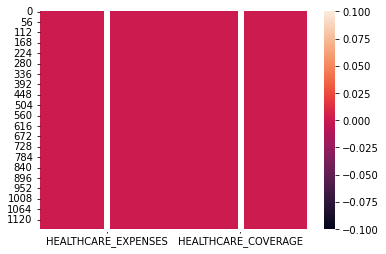

In [58]:
import seaborn as sns
sns.heatmap(df[['HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE']].isnull(),annot = True)

In [271]:
age = []
for index,elem in df.iterrows():
    bdate = datetime.strptime(elem['BIRTHDATE'],"%d-%M-%Y")
    if pd.isnull(elem['DEATHDATE']):
        edate = datetime.today()
    else:
        edate = datetime.strptime(elem['DEATHDATE'],"%d-%M-%Y")
    age.append((edate-bdate).days//365.25)
df['AGE'] = age


In [274]:
df = df.drop(['BIRTHDATE','DEATHDATE'],axis = 1)

In [275]:
df.to_csv('patients_pre.csv',index = False)

## 2. medications.csv

In [137]:
df = pd.read_csv('medications.csv')
df.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)


In [144]:
print("START: ",df['START'].isnull().sum())
print("STOP: ",df['STOP'].isnull().sum())

START:  0
STOP:  0


In [139]:
df = df[df['STOP'].notnull()]
df.shape

(41094, 13)

In [140]:
import numpy as np 
duration = np.zeros(df.shape[0])

In [147]:
df.reset_index(level=0, inplace=True)
df.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)


In [148]:
import time
from dateutil import parser
for index,elem in df.iterrows():
    stime = parser.parse(elem['START'])
    etime = parser.parse(elem['STOP'])
    duration[index] = (etime-stime).days
duration

array([360., 360., 360., ...,  14.,  21.,  60.])

In [149]:
df['duration'] = duration  

In [150]:
df.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION,duration
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN,360.0
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN,360.0
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN,360.0
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder),14.0
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder),14.0


In [151]:
df.columns

Index(['START', 'STOP', 'PATIENT', 'PAYER', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'BASE_COST', 'PAYER_COVERAGE', 'DISPENSES', 'TOTALCOST', 'REASONCODE',
       'REASONDESCRIPTION', 'duration'],
      dtype='object')

In [155]:
df.drop(['START','STOP','PAYER','ENCOUNTER','CODE','BASE_COST','PAYER_COVERAGE','REASONCODE','REASONDESCRIPTION'],axis = 1,inplace = True)
df

,PATIENT,DESCRIPTION,DISPENSES,TOTALCOST,duration
0,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,Etonogestrel 68 MG Drug Implant,12,8124.96,360.0
1,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,Etonogestrel 68 MG Drug Implant,12,7489.08,360.0
2,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,Yaz 28 Day Pack,12,519.84,360.0
3,10339b10-3cd1-4ac3-ac13-ec26728cb592,Acetaminophen 325 MG Oral Tablet,1,8.14,14.0
4,1d604da9-9a81-4ba9-80c2-de3375d59b40,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,1,11.91,14.0
...,...,...,...,...,...
41089,6d048a56-edb8-4f29-891d-7a84d75a8e78,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...,12,232.20,371.0
41090,6d048a56-edb8-4f29-891d-7a84d75a8e78,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,1,43.84,14.0
41091,6d048a56-edb8-4f29-891d-7a84d75a8e78,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...,1,10.95,14.0
41092,fca3178e-fb68-41c3-8598-702d3ca68b96,Aspirin 81 MG Oral Tablet,1,7.35,21.0


In [160]:
len(df['DESCRIPTION'].unique())

105

In [164]:
data = {}
for elem in df['PATIENT'].unique():
    data[elem] = [0,0,0,0]
for index,elem in df.iterrows():
    data[elem['PATIENT']][0] += 1
    data[elem['PATIENT']][1] += elem['DISPENSES']
    data[elem['PATIENT']][2] += elem['TOTALCOST']
    data[elem['PATIENT']][3] += elem['duration']



array = np.array(list(data.values()))


df = pd.DataFrame.from_dict({
    'PATIENT' : list(data.keys()),
    'DOSES' : array[:,0],
    'DISPENSES' : array[:,1],
    'TOTALCOST' : array[:,2],
    'Total Course Duration': array[:,3]
})
df.head()

,PATIENT,DOSES,DISPENSES,TOTALCOST,Total Course Duration
0,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6.0,72.0,24560.76,2160.0
1,10339b10-3cd1-4ac3-ac13-ec26728cb592,3.0,3.0,20.57,49.0
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,2.0,2.0,41.80,35.0
3,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1.0,1.0,6.52,7.0
4,034e9e3b-2def-4559-bb2a-7850888ae060,1.0,1.0,6.41,7.0


In [166]:
df.to_csv('medications_pre.csv',index = False)

## 3. procedures.csv

In [210]:
df = pd.read_csv('procedures.csv')
df.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
1,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,430193006,Medication Reconciliation (procedure),726.51,NaN,NaN
2,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,430193006,Medication Reconciliation (procedure),788.50,NaN,NaN
3,2011-02-07T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,117015009,Throat culture (procedure),2070.44,195662009.0,Acute viral pharyngitis (disorder)
4,2011-04-19T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,117015009,Throat culture (procedure),2479.39,195662009.0,Acute viral pharyngitis (disorder)


In [211]:
df = df.drop(['DATE','ENCOUNTER','REASONCODE','REASONDESCRIPTION','CODE'],axis = 1)
df.head()

,PATIENT,DESCRIPTION,BASE_COST
0,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,Insertion of subcutaneous contraceptive,14896.56
1,10339b10-3cd1-4ac3-ac13-ec26728cb592,Medication Reconciliation (procedure),726.51
2,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,Medication Reconciliation (procedure),788.50
3,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,Throat culture (procedure),2070.44
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,Throat culture (procedure),2479.39


In [212]:
print(len(df['DESCRIPTION'].unique()))

144


In [ ]:
df = df.drop(['DESCRIPTION'])

In [214]:
data = {}
for elem in df['PATIENT'].unique():
    data[elem] = [0,0]
for index,elem in df.iterrows():
    data[elem['PATIENT']][0] += 1
    data[elem['PATIENT']][1] += elem['BASE_COST']

    
array = np.array(list(data.values()))


df = pd.DataFrame.from_dict({
    'PATIENT' : list(data.keys()),
    'PROCEDURES' : array[:,0],
    'TOTAL_PROCEDURE_COST' : array[:,1],
})
df.head()

,PATIENT,PROCEDURES,TOTAL_PROCEDURE_COST
0,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9.0,86631.60
1,10339b10-3cd1-4ac3-ac13-ec26728cb592,5.0,20202.46
2,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7.0,12090.59
3,034e9e3b-2def-4559-bb2a-7850888ae060,2.0,1137.47
4,1d604da9-9a81-4ba9-80c2-de3375d59b40,1.0,416.69


In [216]:
df.to_csv('procedures_pre.csv',index = False)

## 4. Allergies.csv

In [217]:
df = pd.read_csv('allergies.csv')
df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen


In [219]:
df = df.drop(['START','STOP','ENCOUNTER','CODE'],axis = 1)
print(df['DESCRIPTION'].unique())

['Latex allergy' 'Shellfish allergy' 'Allergy to mould'
 'Dander (animal) allergy' 'Allergy to grass pollen'
 'Allergy to tree pollen' 'Allergy to soya' 'Allergy to fish'
 'House dust mite allergy' 'Allergy to eggs' 'Allergy to wheat'
 'Allergy to peanuts' 'Allergy to dairy product' 'Allergy to nut'
 'Allergy to bee venom']


In [226]:
data = {}
for elem in df['PATIENT'].unique():
    data[elem] = 0
for index,elem in df.iterrows():
    data[elem['PATIENT']] += 1
    
df = pd.DataFrame.from_dict({
    'PATIENT' : list(data.keys()),
    'ALLERGIES' : list(data.values())
})
df.to_csv('allergies_pre.csv',index = False)

## 5. Conditions.csv

In [231]:
df = pd.read_csv('conditions.csv')
df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)


In [232]:
df = df.drop(['START','STOP','ENCOUNTER','CODE'],axis = 1)
print(len(df['DESCRIPTION'].unique()))

129


In [233]:
data = {}
for elem in df['PATIENT'].unique():
    data[elem] = 0
for index,elem in df.iterrows():
    data[elem['PATIENT']] += 1
    
df = pd.DataFrame.from_dict({
    'PATIENT' : list(data.keys()),
    'CONDITIONS' : list(data.values())
})
df.to_csv('conditions_pre.csv',index = False)

## 6. imaging_studies.csv

In [234]:
df = pd.read_csv('imaging_studies.csv')
df.head()

,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,d3e49b38-7634-4416-879d-7bc68bf3e7df,2014-07-08T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,3a36836d-da25-4e73-808b-972b669b7e4e,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,46baf530-4941-40ab-8219-685a08fd9086,2014-01-22T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,33b71e4b-0690-4fe9-897a-dc3b2ff9215c,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
2,b8fb8a6e-a2f5-46c9-8b3f-a35aa982efcd,2001-12-01T02:08:27Z,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,e42d1046-568d-46c2-b0a5-d910b2f3bd1d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
3,10c8a016-4504-4653-bddf-2dd3610886c8,2004-07-03T20:46:46Z,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,323fca87-817f-4d58-8486-ba92ea739399,51299004,Clavicle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
4,4221534c-d379-4c6b-a22e-d7eae3fa2609,2017-02-08T08:42:44Z,d49f748f-928d-40e8-92c8-73e4c5679711,cfef48b3-b769-4794-a3e7-f57f7ba8d387,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage


In [236]:
print(len(df['PATIENT'].unique())) # Very Less Patients 

247


## 7. encounters.csv

In [242]:
df = pd.read_csv('encounters.csv')
df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


In [243]:
df = df.drop(['Id',
    'PROVIDER','PAYER','CODE','DESCRIPTION','REASONCODE','REASONDESCRIPTION','BASE_ENCOUNTER_COST',
              'PAYER_COVERAGE','ORGANIZATION'],axis = 1)
df.head()

,START,STOP,PATIENT,ENCOUNTERCLASS,TOTAL_CLAIM_COST
0,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,ambulatory,129.16
1,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,wellness,129.16
2,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,ambulatory,129.16
3,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,wellness,129.16
4,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,wellness,129.16


In [244]:
print("START: ",df["START"].isnull().sum())
print("STOP: ",df["STOP"].isnull().sum())

START:  0
STOP:  0


In [251]:
duration = []
for index,elem in df.iterrows():
    sdate = parser.parse(elem['START'])
    edate = parser.parse(elem['STOP'])
    duration.append((edate-sdate).total_seconds())
df['ENCOUNTER_DURATION'] = duration

In [255]:
df = df.drop(['START','STOP'],axis = 1)
df.head()

,PATIENT,ENCOUNTERCLASS,TOTAL_CLAIM_COST,ENCOUNTER_DURATION
0,034e9e3b-2def-4559-bb2a-7850888ae060,ambulatory,129.16,1500.0
1,034e9e3b-2def-4559-bb2a-7850888ae060,wellness,129.16,900.0
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,ambulatory,129.16,900.0
3,1d604da9-9a81-4ba9-80c2-de3375d59b40,wellness,129.16,900.0
4,10339b10-3cd1-4ac3-ac13-ec26728cb592,wellness,129.16,1800.0


In [257]:
data = {}
for elem in df['PATIENT'].unique():
    data[elem] = [0,0,0]
for index,elem in df.iterrows():
    data[elem['PATIENT']][0] += 1
    data[elem['PATIENT']][1] += elem['TOTAL_CLAIM_COST']
    data[elem['PATIENT']][2] += elem['ENCOUNTER_DURATION']
    
    
df = pd.DataFrame.from_dict({
    'PATIENT' : list(data.keys()),
    'ENCOUNTERS' : array[:,0],
    'TOTAL_CLAIM_COST' : array[:,1],
    'ENCOUNTER_DURATION' : array[:,2]
})
df.to_csv('encounters_pre.csv',index = False)

IndexError: index 2 is out of bounds for axis 1 with size 2